In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
shipments_df = pd.read_csv('../Datasets/ApplianceShipments.csv')
shipments_df.head()

,Quarter,Shipments
0,Q1-1985,4009
1,Q2-1985,4321
2,Q3-1985,4224
3,Q4-1985,3944
4,Q1-1986,4123


## Data preprocessing

In [3]:
shipments_df['Year'] = shipments_df['Quarter'].map(lambda x: int(x.split('-')[1]))
shipments_df['Quarter_new'] = shipments_df['Quarter'].map(lambda x: x.split('-')[0])

In [4]:
shipments_df
shipments_df.rename(columns={
    'Quarter': 'QuarterAndYear',
    'Quarter_new': 'Quarter'
}, inplace=True)

## Time series plot

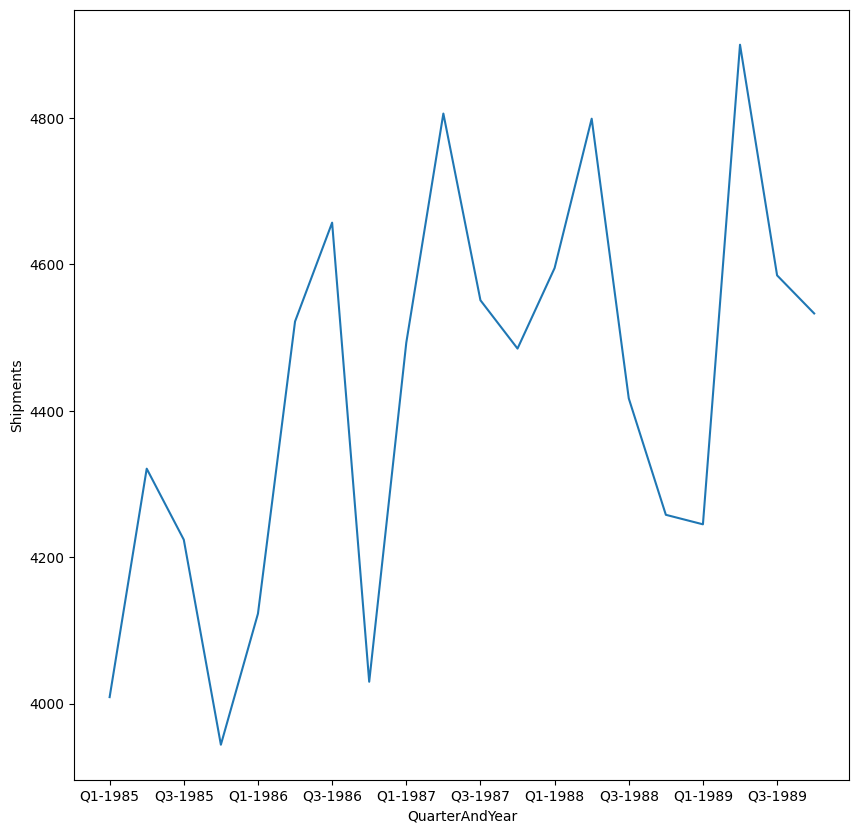

In [5]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.lineplot(data=shipments_df, x='QuarterAndYear', y='Shipments', ax=ax)
ax.set_xticks(shipments_df.loc[:: 2, 'QuarterAndYear'])
plt.show()

We do see some seasonality in the appliance shipment data. The number of shipments peaks during the 2nd quarter (summer) and drops to its lowest during the 4th quarter (winter). This is likely because people spend more time outdoors during the summer and hence order more appliances. During the winter season, people tend to stay indoors and hence order fewer appliances.

## Quarterly plots

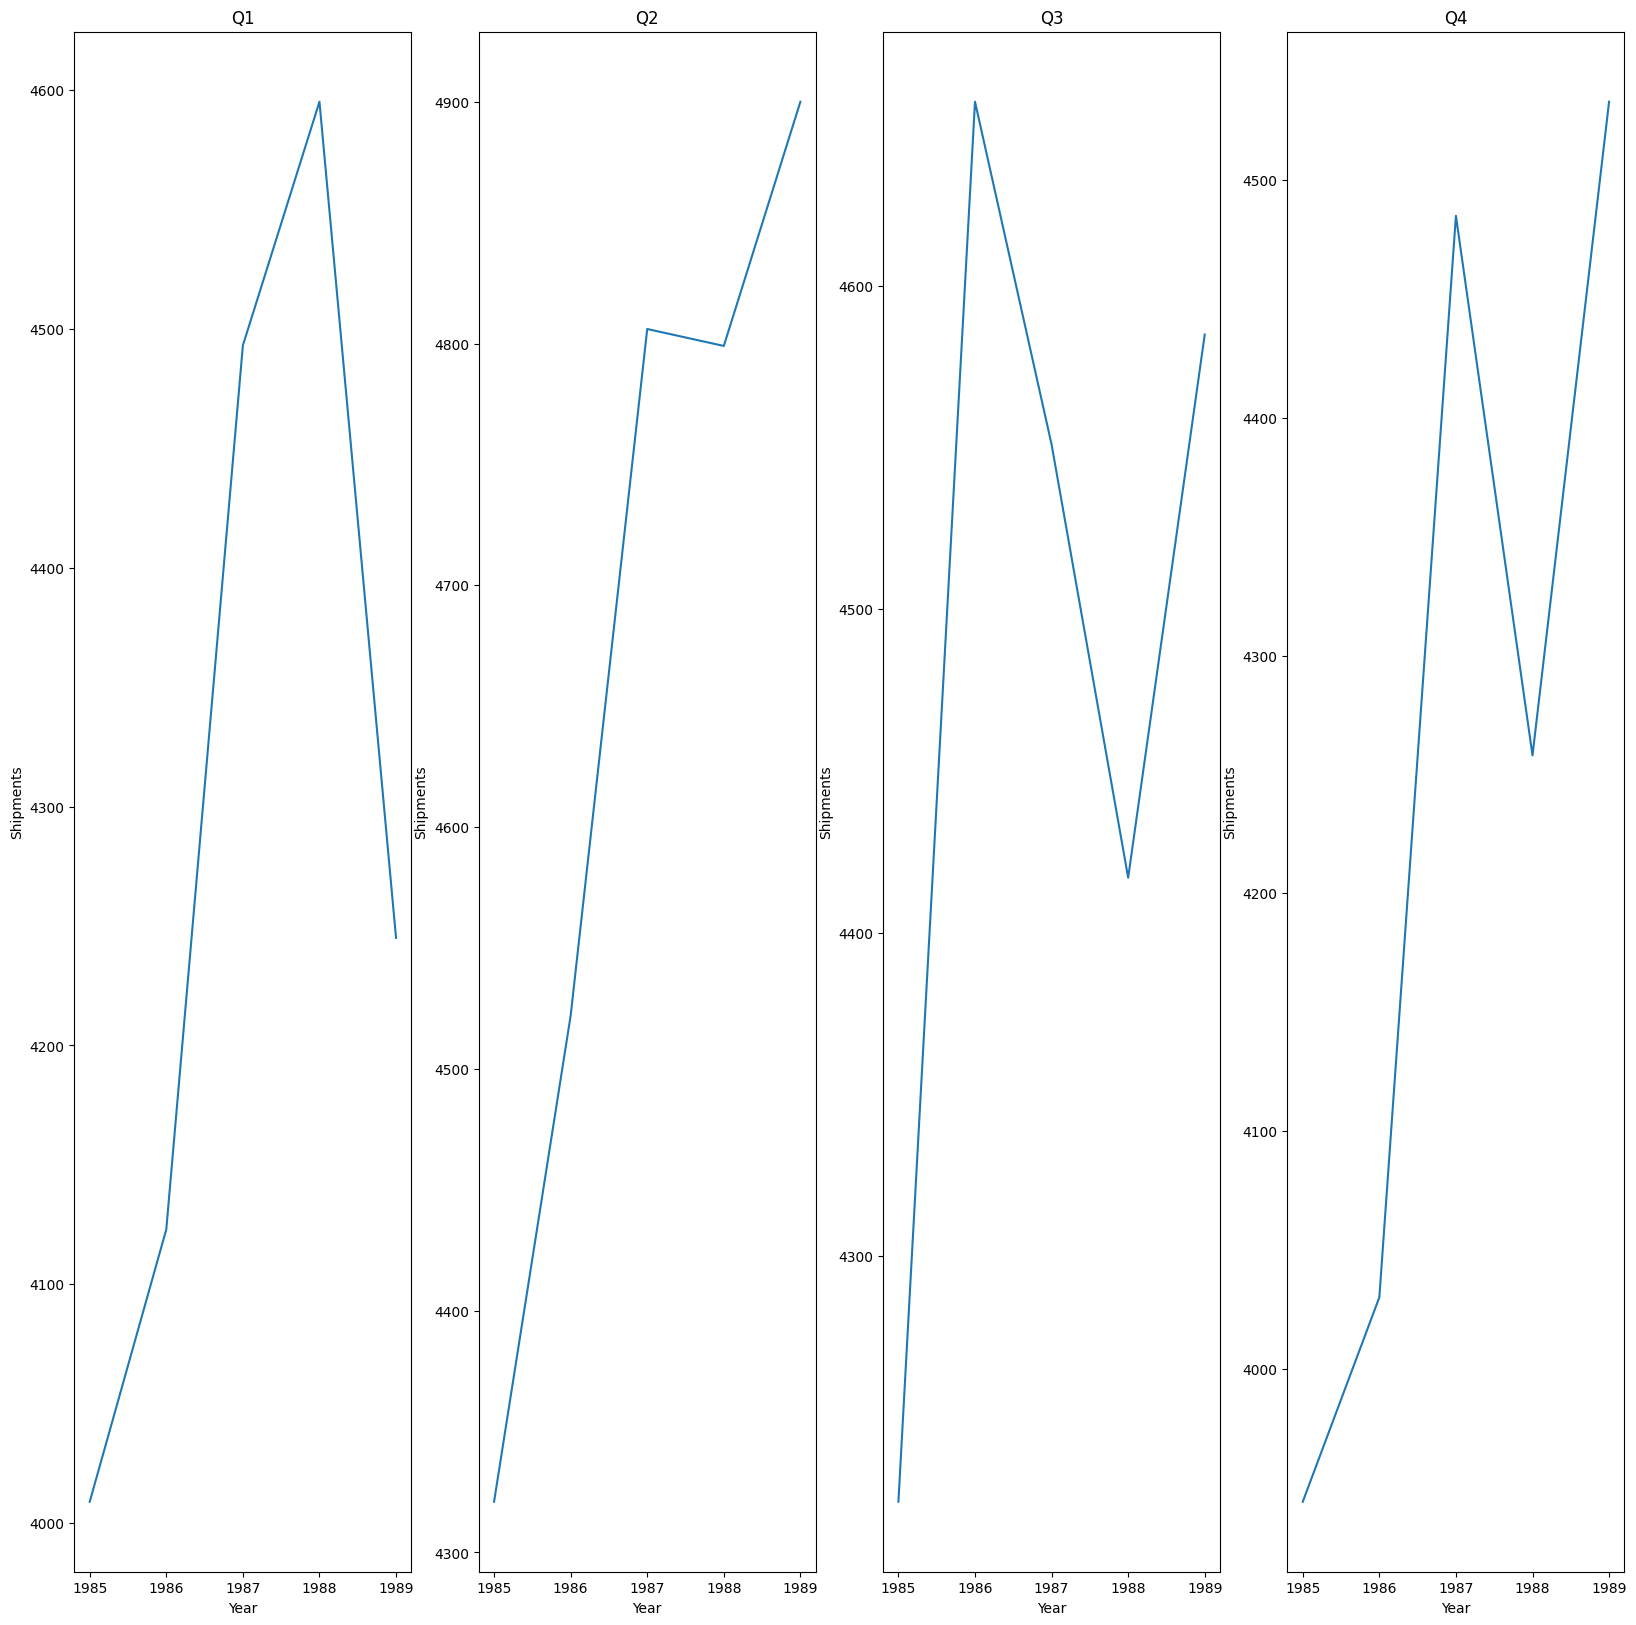

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 20))
for i, quarter in enumerate(shipments_df['Quarter'].unique()):
    sns.lineplot(data=shipments_df[shipments_df['Quarter'] == quarter], x='Year', y='Shipments', ax=ax[i])
    ax[i].set_title(quarter)
plt.show()

There is a difference between the quarters. Q3 and Q4 exhibit a somewhat similar pattern. However, we see a peak in the number of shipments in the year 1988 for Q1, but not for any quarters, for example. However, there is an increasing trend in the number of shipments over the years for all the quarters.

## Annual plot

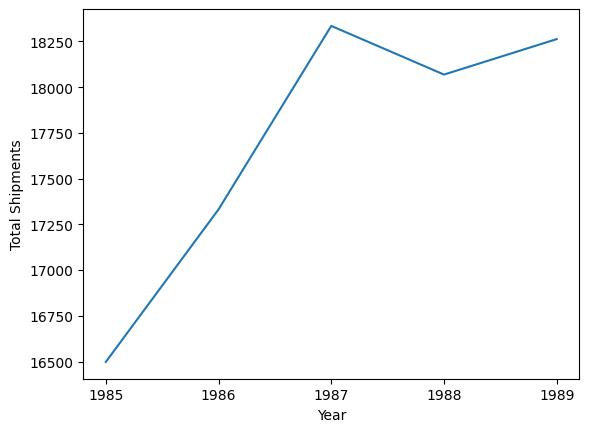

In [29]:
fig, ax = plt.subplots()
grouped_shipments_df = shipments_df.groupby(by='Year').sum(numeric_only=True)
grouped_shipments_df.rename(columns={'Shipments': 'Total Shipments'}, inplace=True)
sns.lineplot(data=grouped_shipments_df, x=grouped_shipments_df.index, y='Total Shipments', ax=ax)
ax.set_xticks(grouped_shipments_df.index)
plt.show()

When we analyze the total shipments over the years, we see that the total shipments have increased over the years from 1985 to 1989. There is a peak in 
the year 1987 - followed by a short dip in 1988 - and then a rise again in 1989. This is the same pattern we saw in the quarterly analysis.